<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

<font size=7 align='left' face='fantasy' color = #017DD3>Tripping Through Walmart : <font color=#FFC21F>Classifying Walmart Shopping Trips for Enhanced Customer Insights</font><BR CLEAR=ALL />

<img src='https://i.ibb.co/nnF9QDg/Supermarket-shopping-3.png' width="1000" height="500" align="left" style="border:10px grey;"><br>

<font size=4 align='left'><br>
Walmart uses both art and science to continually make progress on their core mission of better understanding and serving their customers. One way Walmart is able to improve customers' shopping experiences is by segmenting their store visits into different trip types.
Whether they're on a last minute run for new puppy supplies or leisurely making their way through a weekly grocery list, classifying trip types enables Walmart to create the best shopping experience for every customer.
Currently, Walmart's trip types are created from a combination of existing customer insights ("art") and purchase history data ("science"). The goal of this project is to classify customer trips using only a transactional dataset of the items they've purchased and improve the science behind trip type classification that will help Walmart refine their segmentation process.<br>

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Steps to solve a Machine Learning Problem**

---



<font size=4 align='left'><br>
<li>Understand the business requirements and the nature of the available data.</li>
<li>Classify the problem as supervised/unsupervised and regression/classification.</li>
<li>Download, clean & explore the data and create new features that may improve models.</li>
<li>Create training/test/validation sets and prepare the data for training ML models.</li>
<li>Create a quick & easy baseline model to evaluate and benchmark future models.</li>
<li>Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.</li>
<li>Experiment and combine results from multiple strategies to get a better result.</li>
<li>Interpret models, study individual predictions, and present findings.</li>
</font>

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Understanding the business requirements and the nature of the available data**


---



<font size=4 align='left'>
Walmart, as a retail giant, aims to gain a deeper understanding of customer shopping behavior and patterns within their stores. By accurately classifying different trip types, Walmart can enhance its marketing strategies, optimize store layouts, improve inventory management, and provide personalized shopping experiences.
The specific business requirements for this project include <b><i>classifying Walmart trips based on shopping patterns</b></i>, <b><i>obtain data driven insights</b></i>, <b><i>optimize marketing</b></i>, <b><i>optimize store layout</b></i>, <b><i>provide personalized shopping experience</b></i>, <b><i>ensure inventory management</b></i> etc.

In [2]:
# Understanding Nature of available data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)
warnings.filterwarnings("ignore")

In [3]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/anshikanigam14/walmart-trip-type-classification'
od.download(dataset_url)

Skipping, found downloaded files in "./walmart-trip-type-classification" (use force=True to force download)


In [4]:
walmart_train = pd.read_csv("/content/walmart-trip-type-classification/walmart_train.csv")
print(walmart_train.head())
print(walmart_train.shape)

   TripType  VisitNumber Weekday           Upc  ScanCount  DepartmentDescription  FinelineNumber
0       999            5  Friday  6.811315e+10         -1     FINANCIAL SERVICES          1000.0
1        30            7  Friday  6.053882e+10          1                  SHOES          8931.0
2        30            7  Friday  7.410811e+09          1          PERSONAL CARE          4504.0
3        26            8  Friday  2.238404e+09          2  PAINT AND ACCESSORIES          3565.0
4        26            8  Friday  2.006614e+09          2  PAINT AND ACCESSORIES          1017.0
(647054, 7)


In [5]:
walmart_test = pd.read_csv("/content/walmart-trip-type-classification/walmart_test.csv")
print(walmart_test.head())
print(walmart_test.shape)

   VisitNumber Weekday           Upc  ScanCount DepartmentDescription  FinelineNumber
0            1  Friday  7.250339e+10          1                 SHOES          3002.0
1            1  Friday  1.707711e+09          1                 DAIRY          1526.0
2            1  Friday  8.947000e+10          1                 DAIRY          1431.0
3            1  Friday  8.849121e+10          1     GROCERY DRY GOODS          3555.0
4            2  Friday  2.840015e+09          1           DSD GROCERY          4408.0
(653646, 6)


<font size=3 align='left'><br>
Upon inspection we observe, that we are given two datasets, training and test. The column "TripType" is our target column and the rest are our input features. The description of all the columns given is as follows:
<li><i><b>TripType:</b></i> TripType is a categorical identifier that represents the type of shopping trip made by a customer. It categorizes trips based on the customer's buying behavior, preferences, and the items purchased. TripType serves as the ground truth or target variable that you are trying to predict in your analysis. The TripType_999 category is a special category used to represent trips that do not fit into any specific type and are considered as "other."</li>

<li><i><b>VisitNumber:</b></i> VisitNumber is an identifier assigned to each unique trip made by a single customer. It distinguishes one shopping trip from another and allows tracking of individual customer behavior within the dataset. Each VisitNumber corresponds to a specific customer and can have multiple rows associated with it, representing the items purchased during that trip.</li>

<li><i><b>Weekday:</b></i> Weekday indicates the day of the week on which the shopping trip took place. It provides information about the timing and frequency of customer visits, allowing for analysis of shopping patterns based on different weekdays.</li>

<li><i><b>Upc:</b></i> UPC (Universal Product Code) is a unique numerical identifier assigned to each product sold at Walmart. It serves as a barcode representation of the product, facilitating efficient scanning at the point of sale. The Upc column in the dataset contains the UPC numbers of the products purchased by customers during their shopping trips.</li>

<li><i><b>ScanCount:</b></i> ScanCount represents the number of times a particular item was purchased during a specific trip. It can be a positive or negative integer. A positive value indicates a purchase, while a negative value signifies a product return. ScanCount provides insights into the quantity or frequency of purchases for each item.</li>

<li><i><b>DepartmentDescription:</b></i> DepartmentDescription provides a high-level description of the item's department to which a purchased product belongs. It represents the broader category or section of the store where the item is located, such as "Grocery," "Clothing," "Electronics," etc. This variable helps in analyzing customer preferences for different departments.</li>

<li><i><b>FinelineNumber:</b></i> FinelineNumber is a more refined category assigned to each product by Walmart. It provides a more specific classification for each item within its department. FinelineNumber allows for a more granular analysis of customer preferences and behaviors based on the specific product types or subcategories.</li>

These variables collectively provide valuable information for analyzing customer behavior, predicting trip types, understanding shopping patterns, and optimizing retail operations within Walmart's dataset.

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Classifying the problem**


---

<font size=3 align='left'><br>
The "Walmart Recruiting - Trip Type Classification" problem can be classified as supervised learning and classification.<br>

<b><i>Supervised Learning</b></i>: The problem is classified as supervised learning because the dataset includes labeled examples, where each instance (shopping trip) is associated with a known trip type category. The goal is to train a model to predict the trip type based on the input features.<br>

<b><i>Classification</b></i>: The problem is a classification task because the objective is to assign each shopping trip to one of the predefined trip type categories. The model will learn patterns and relationships in the data to classify future, unseen trips into their respective types.

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Performing data cleaning, and EDA, and generating new features**


---

In [6]:
# Info of the training dataset
print(walmart_train.info())
print(walmart_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB
None
            TripType    VisitNumber           Upc      ScanCount  FinelineNumber
count  647054.000000  647054.000000  6.429250e+05  647054.000000   642925.000000
mean       58.584511   96167.640078  3.060698e+10       1.108878     3726.884567
std       157.635533   55545.485154  9.120134e+10       0.700776     2780.966158
min         3.000000 

### **<font color = Purple>Removing Duplicates and Filtering Noise from the Dataset**

In [7]:
# Drop duplicates if present
def drop_duplicates(df):
  df_de_duplicated = df.drop_duplicates()
  return df_de_duplicated

print("Original shape of the training dataset: ", walmart_train.shape)
print("Original shape of the test dataset: ", walmart_test.shape)
print("Total duplicates in the training dataset: ", len(walmart_train[walmart_train.duplicated()]))
print("Total duplicates in the test dataset: ", len(walmart_test[walmart_test.duplicated()]))
walmart_train = drop_duplicates(walmart_train)
walmart_test = drop_duplicates(walmart_test)
print("Shape of the training dataset after dropping duplicates: ", walmart_train.shape)
print("Shape of the test dataset after dropping duplicates: ", walmart_test.shape)

Original shape of the training dataset:  (647054, 7)
Original shape of the test dataset:  (653646, 6)
Total duplicates in the training dataset:  5704
Total duplicates in the test dataset:  5644
Shape of the training dataset after dropping duplicates:  (641350, 7)
Shape of the test dataset after dropping duplicates:  (648002, 6)


The "TripType" column contains triptype "999" which may negatively effect impact our model's performance. It may add ambiguity and noise and cause model bias.

In [8]:
# drop 999 triptype to reduce noise in dataset
def remove_999_triptype(df):
    triptypes_train = df.groupby('TripType')['VisitNumber'].nunique().sort_values(ascending=False).head(10)
    print(triptypes_train)
    # Remove rows with TripType 999
    df = df[df['TripType'] != 999]
    print("Shape of the training dataset after dropping TripType 999: ", df.shape)
    return df

walmart_train= remove_999_triptype(walmart_train)

TripType
8      12161
39      9896
9       9464
999     8444
40      6130
7       5752
5       4593
25      3698
3       3643
36      3005
Name: VisitNumber, dtype: int64
Shape of the training dataset after dropping TripType 999:  (624136, 7)


### **<font color = Purple>Handling Missing Values**

<font size=3 align='left'>
Columns "UPC", "FinelineNumber", and "DepartmentDescription" contain missing values. Since, 'FinelineNumber' represents a more specific product classification, mode imputation can be a reasonable approach. Replace the missing values with the mode (most frequent 'FinelineNumber') of the corresponding department or a combination of department and other relevant features.
</font>


In [9]:
# Total Missing Values in all columns - TRAINING
print(walmart_train.isnull().sum().sort_values(ascending = False))
print(walmart_train.describe())

# Total Missing Values in all columns - TRAINING
print(walmart_test.isnull().sum().sort_values(ascending = False))
print(walmart_test.describe())

Upc                      2586
FinelineNumber           2586
DepartmentDescription    1041
TripType                    0
VisitNumber                 0
Weekday                     0
ScanCount                   0
dtype: int64
            TripType    VisitNumber           Upc      ScanCount  FinelineNumber
count  624136.000000  624136.000000  6.215500e+05  624136.000000   621550.000000
mean       32.353758   96199.192058  2.977863e+10       1.143643     3740.634306
std        11.756201   55568.338192  8.986805e+10       0.650419     2774.571703
min         3.000000       7.000000  8.340000e+02     -12.000000        0.000000
25%        26.000000   49321.000000  3.400000e+09       1.000000     1406.000000
50%        39.000000   97101.000000  7.047000e+09       1.000000     3355.000000
75%        40.000000  144411.250000  2.259220e+10       1.000000     5501.000000
max        44.000000  191347.000000  9.789707e+11      71.000000     9998.000000
Upc                      2830
FinelineNumber    

In [10]:
def impute_missing_values(df_train, df_test):
    # Impute 'DepartmentDescription'
    df_train['DepartmentDescription'].fillna(df_train['DepartmentDescription'].mode()[0], inplace=True)
    df_test['DepartmentDescription'].fillna(df_test['DepartmentDescription'].mode()[0], inplace=True)
    # Impute 'Upc'
    df_train['Upc'].fillna(df_train['Upc'].mode()[0], inplace=True)
    df_test['Upc'].fillna(df_test['Upc'].mode()[0], inplace=True)
    # Impute missing 'FinelineNumber' values with the mode of the corresponding department
    df_train['FinelineNumber'] = df_train.groupby('DepartmentDescription')['FinelineNumber'].transform(lambda x: x.fillna(x.mode()[0]))
    df_test['FinelineNumber'] = df_test.groupby('DepartmentDescription')['FinelineNumber'].transform(lambda x: x.fillna(x.mode()[0]))
    return df_train, df_test

walmart_train, walmart_test = impute_missing_values(walmart_train, walmart_test)
print("Our training dataset contains no null values:\n", walmart_train.isnull().sum().sort_values(ascending=False))
print("Our test dataset contains no null values:\n", walmart_test.isnull().sum().sort_values(ascending=False))

Our training dataset contains no null values:
 TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64
Our test dataset contains no null values:
 VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64


### **<font color = Purple>Encoding Categorical Columns**

In [11]:
# Categorical columns in Training dataset
print(walmart_train.dtypes)
print("Total unique values in training dataset department description: ", walmart_train['DepartmentDescription'].nunique())
print(walmart_train['Weekday'].unique())
print(walmart_train['DepartmentDescription'].nunique())

# Categorical columns in Test dataset
print(walmart_test.dtypes)
print("Total unique values in training dataset department description: ", walmart_test['DepartmentDescription'].nunique())
print(walmart_test['Weekday'].unique())
print(walmart_test['DepartmentDescription'].nunique())

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object
Total unique values in training dataset department description:  68
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
68
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object
Total unique values in training dataset department description:  67
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
67


We have two columns with categorical data "Weekday" and "DepartmentDescription" which need to be encoded before we run our models.<br>

For "Weekday" we have ordinal data so the preferred method of encoding would be <b>Ordinal Encoding</b>. Ordinal encoding assigns a unique integer value to each category based on their order or natural ranking. In the case of weekdays, you can assign values such as 1 for Monday, 2 for Tuesday, and so on.<br>
For "DepartmentDescription" we will be using <b>Frequency Encoding</b>. This method replaces each category with its frequency or occurrence in the dataset. It assigns a value based on how frequently a particular category appears in the "DepartmentDescription" column. Since we have 68 unique "DepartmentDescription" values, we will run into the "curse of dimensionality" if we use one hot encoding which will directly effect our model's performance.

In [12]:
def encode_features(df_train, df_test):
    # Frequency Encoding for 'DepartmentDescription' in Training and Test
    frequency_encoding = df_train['DepartmentDescription'].value_counts(normalize=True)
    df_train['Department_Encoded'] = df_train['DepartmentDescription'].map(frequency_encoding)

    frequency_encoding = df_test['DepartmentDescription'].value_counts(normalize=True)
    df_test['Department_Encoded'] = df_test['DepartmentDescription'].map(frequency_encoding)

    # Weekday Encoding
    weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    df_train['Weekday_Encoded'] = df_train['Weekday'].map(weekday_mapping)

    weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    df_test['Weekday_Encoded'] = df_test['Weekday'].map(weekday_mapping)
    return df_train, df_test

walmart_train, walmart_test = encode_features(walmart_train, walmart_test)
print("Encoded Walmart Test: \n", walmart_test.head())
print("Encoded Walmart Training: \n", walmart_train.head())

Encoded Walmart Test: 
    VisitNumber Weekday           Upc  ScanCount DepartmentDescription  FinelineNumber  Department_Encoded  Weekday_Encoded
0            1  Friday  7.250339e+10          1                 SHOES          3002.0            0.009514                5
1            1  Friday  1.707711e+09          1                 DAIRY          1526.0            0.068869                5
2            1  Friday  8.947000e+10          1                 DAIRY          1431.0            0.068869                5
3            1  Friday  8.849121e+10          1     GROCERY DRY GOODS          3555.0            0.112912                5
4            2  Friday  2.840015e+09          1           DSD GROCERY          4408.0            0.105277                5
Encoded Walmart Training: 
    TripType  VisitNumber Weekday           Upc  ScanCount  DepartmentDescription  FinelineNumber  Department_Encoded  Weekday_Encoded
1        30            7  Friday  6.053882e+10          1                  S

### **<font color = Purple>Feature Engineering**

<font size=3 align='left'>
<b><i>TotalItems:</i></b> Calculates the total number of items purchased during each trip by summing the ScanCount values.

<b><i>ReturnItems:</i></b> Counts the number of returned items during each trip by summing the negative ScanCount values.

<b><i>UniqueItems:</i></b> Determines the count of unique items purchased during each trip by considering the distinct UPC values.

<b><i>AverageScanCount:</i></b> Calculates the average ScanCount per item for each trip by dividing the sum of ScanCount by the total number of items.

<b><i>DepartmentCount:</i></b> Counts the number of different departments visited during each trip by counting the distinct DepartmentDescription values.

<b><i>PopularDepartment:</i></b> Identifies the most frequently visited department during each trip by determining the mode of DepartmentDescription.

<b><i>DepartmentFrequency:</i></b> Calculates the frequency of visits to each department by grouping the data by VisitNumber and DepartmentDescription and counting the occurrences.

<b><i>WeekdayEncoded:</i></b> Encodes the Weekday column into numerical values for modeling purposes. For example, assign Monday as 1, Tuesday as 2, and so on.
</font>


In [13]:
%%time
def encode_additional_features(df):
    # Calculate and encode additional features
    df['TotalItems'] = df.groupby('VisitNumber')['ScanCount'].transform('sum')
    df['ReturnItems'] = df.groupby('VisitNumber')['ScanCount'].transform('sum')
    df['UniqueItems'] = df.groupby('VisitNumber')['Upc'].transform('nunique')
    df['DepartmentCount'] = df.groupby('VisitNumber')['DepartmentDescription'].transform('nunique')
    df['PopularDepartment'] = df.groupby('VisitNumber')['DepartmentDescription'].transform(lambda x: x.mode()[0])
    df['DepartmentFrequency'] = df.groupby(['VisitNumber', 'DepartmentDescription'])['VisitNumber'].transform('count')
    return df

# Call the function with your 'walmart_train' dataset
walmart_train = encode_additional_features(walmart_train)
print("Encoded Walmart Training: \n", walmart_train.head())

# Call the function with your 'walmart_test' dataset
walmart_test = encode_additional_features(walmart_test)
print("Encoded Walmart Test: \n", walmart_test.head())

Encoded Walmart Training: 
    TripType  VisitNumber Weekday           Upc  ScanCount  DepartmentDescription  FinelineNumber  Department_Encoded  Weekday_Encoded  TotalItems  ReturnItems  UniqueItems  DepartmentCount  \
1        30            7  Friday  6.053882e+10          1                  SHOES          8931.0            0.009235                5           2            2            2                2   
2        30            7  Friday  7.410811e+09          1          PERSONAL CARE          4504.0            0.066072                5           2            2            2                2   
3        26            8  Friday  2.238404e+09          2  PAINT AND ACCESSORIES          3565.0            0.002596                5          28           28           21                7   
4        26            8  Friday  2.006614e+09          2  PAINT AND ACCESSORIES          1017.0            0.002596                5          28           28           21                7   
5        26 

In [14]:
!pip install pyarrow --quiet

In [15]:
%%time
# Saving the processed data in the disk
walmart_train.to_parquet('walmart_train_processed.parquet')
walmart_test.to_parquet('walmart_test_processed.parquet')

CPU times: user 1.02 s, sys: 142 ms, total: 1.16 s
Wall time: 1.56 s


### **<font color = Purple>Exploratory Data Analysis**

<font size=3 color=Orange ><b><i>Total Visits per day</b></font></i>

     Weekday  TotalVisits
3     Sunday       130132
2   Saturday       118140
0     Friday        92660
1     Monday        80110
5    Tuesday        69581
6  Wednesday        68213
4   Thursday        65300


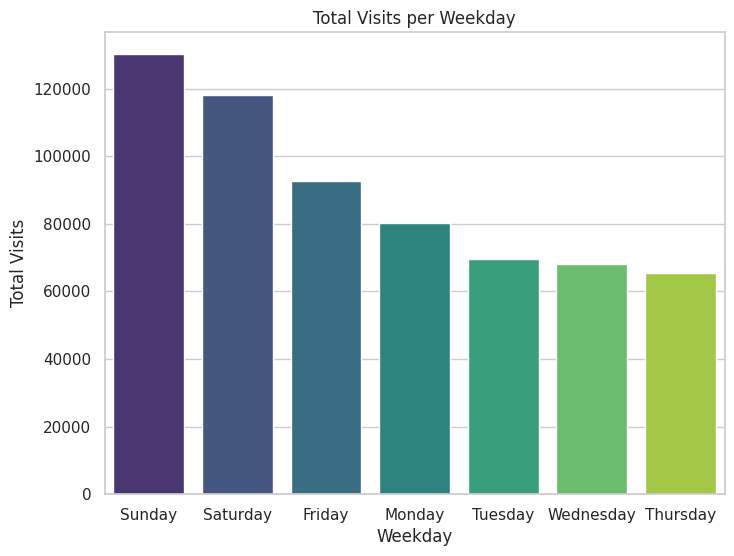

In [16]:
# Total visits per weekday
total_visits_per_weekday = walmart_train.groupby('Weekday')['VisitNumber'].count().reset_index()
# Rename the columns
total_visits_per_weekday.columns = ['Weekday', 'TotalVisits']
total_visits_per_weekday = total_visits_per_weekday.sort_values(by = 'TotalVisits', ascending=False)
print(total_visits_per_weekday)
# Bar chart using Seaborn countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.barplot(x='Weekday', y='TotalVisits', data=total_visits_per_weekday, palette='viridis')

# Adding labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Visits')
plt.title('Total Visits per Weekday')
plt.show()

The above graph shows there is a significant increase in foot traffic around the weekends.

<font size=3 color=Orange ><b><i>Popularity of departments by Total Items</b></font></i>

       Weekday   DepartmentDescription  ItemsPurchased
221     Sunday       GROCERY DRY GOODS           15491
214     Sunday             DSD GROCERY           14363
154   Saturday       GROCERY DRY GOODS           13142
147   Saturday             DSD GROCERY           12579
252     Sunday                 PRODUCE           11399
..         ...                     ...             ...
144   Saturday          CONCEPT STORES               2
385    Tuesday                SEASONAL               2
46      Friday       OTHER DEPARTMENTS               1
419  Wednesday  HEALTH AND BEAUTY AIDS               1
211     Sunday          CONCEPT STORES               1

[460 rows x 3 columns]
DepartmentDescription  1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  BATH AND SHOWER  BEAUTY  BEDDING  BOOKS AND MAGAZINES  BOYS WEAR  BRAS & SHAPEWEAR  CAMERAS AND SUPPLIES  CANDY, TOBACCO, COOKIES  \
Weekday                                                                                                            

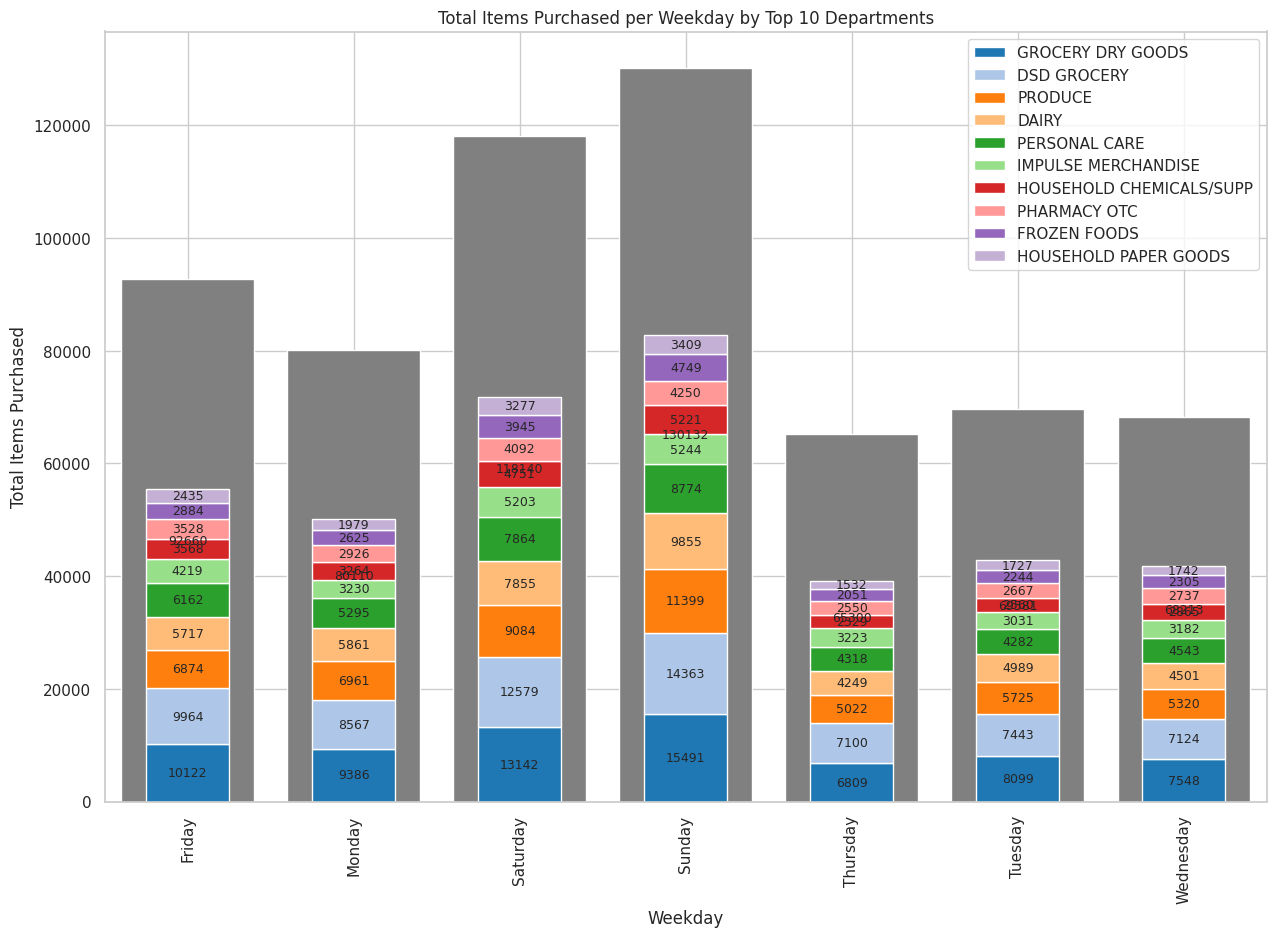

In [17]:
# Popularity of departments by Total Items
total_items_per_weekday_department = walmart_train.groupby(['Weekday', 'DepartmentDescription'])['TotalItems'].count().reset_index()
total_items_per_weekday_department.columns = ['Weekday', 'DepartmentDescription', 'ItemsPurchased']
total_items_per_weekday_department = total_items_per_weekday_department.sort_values(by = 'ItemsPurchased', ascending=False)
print(total_items_per_weekday_department)
# Pivot the DataFrame to get 'DepartmentDescription' as columns
items_pivot = total_items_per_weekday_department.pivot(index='Weekday', columns='DepartmentDescription', values='ItemsPurchased')
print(items_pivot)

# Get the top 10 highest foot traffic departments based on average visits per weekday
top_10_departments = items_pivot.mean().sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top 10 departments
items_pivot_top_10 = items_pivot[top_10_departments]
print(items_pivot_top_10)

# Create the stacked bar chart using Seaborn for the top 10 departments
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
sns.set_palette("tab20")  # You can use different palettes for different colors
sns.barplot(data=items_pivot, x=items_pivot.index, y=items_pivot.sum(axis=1), color='grey')  # The total visits bar
ax = items_pivot_top_10.plot(kind='bar', stacked=True, ax=plt.gca())  # The stacked bars for the top 10 departments

# Adding labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Items Purchased')
plt.title('Total Items Purchased per Weekday by Top 10 Departments')

# Show the plot
plt.legend(loc='upper right')  # Add a legend for the departments
# Adding data labels to the stacked bars
for p in ax.patches:
    # Calculate the x and y coordinates for the text annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    value = int(p.get_height())  # Get the height (value) of the bar and convert to an integer

    # Add the text annotation
    ax.annotate(value, (x, y), ha='center', va='center', fontsize=9)
plt.show()

<font size=3 color=Orange ><b><i>Correlation between Triptypes and Weekdays</b></font></i>

Pivot Table:
 Weekday   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
TripType                                                                
3           1406     829      1168     901       760      859        896
4            152     110       163     148       105       96        119
5           2000    1663      2182    1703      1662     1685       1785
6            649     333       849     441       376      343        381
7           3222    3283      3550    3991      2855     2956       3222
...          ...     ...       ...     ...       ...      ...        ...
40         22837   22243     36133   42754     14589    17826      16649
41           856     556      1203    1269       655      420        500
42          2889    2019      4003    4155      2139     1955       2141
43          1121     824      1204    1153       619      635        776
44          2883    2221      4430    4202      2136     1854       2525

[37 rows x 7 columns]
Correlation Ma

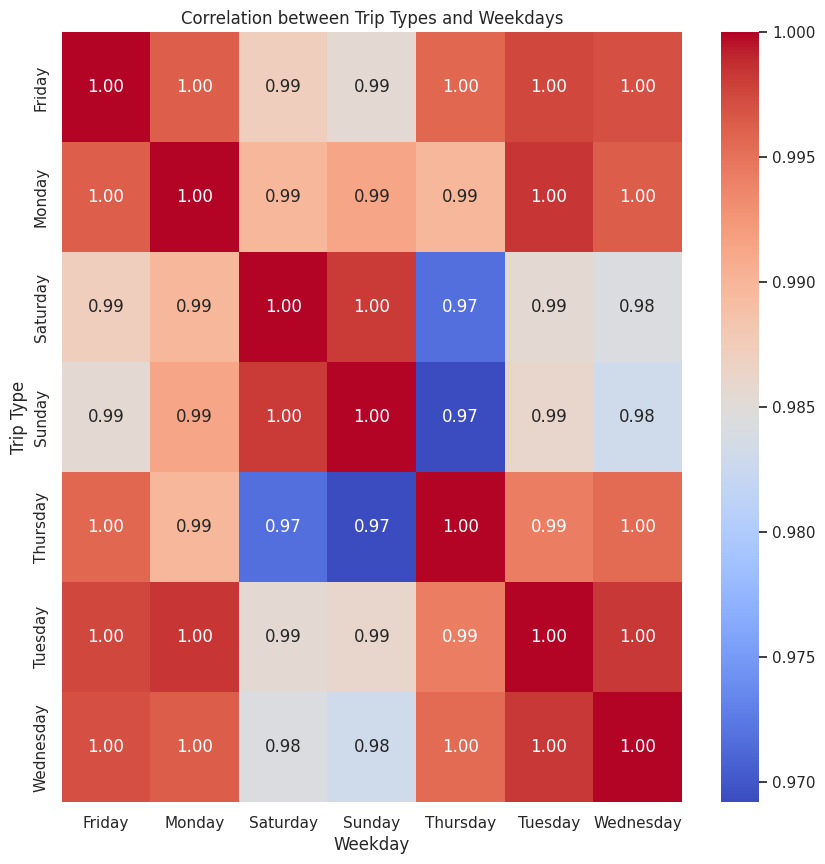

In [18]:
pivot_table = pd.crosstab(walmart_train['TripType'], walmart_train['Weekday'])
correlation_matrix = pivot_table.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Trip Types and Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Trip Type')
# plt.show()

print("Pivot Table:\n", pivot_table)
print("Correlation Matrix:\n", correlation_matrix)

<font size=3 color=Orange ><b><i>Visualising Numeric Columns using Pair
Plot<b></font></i>

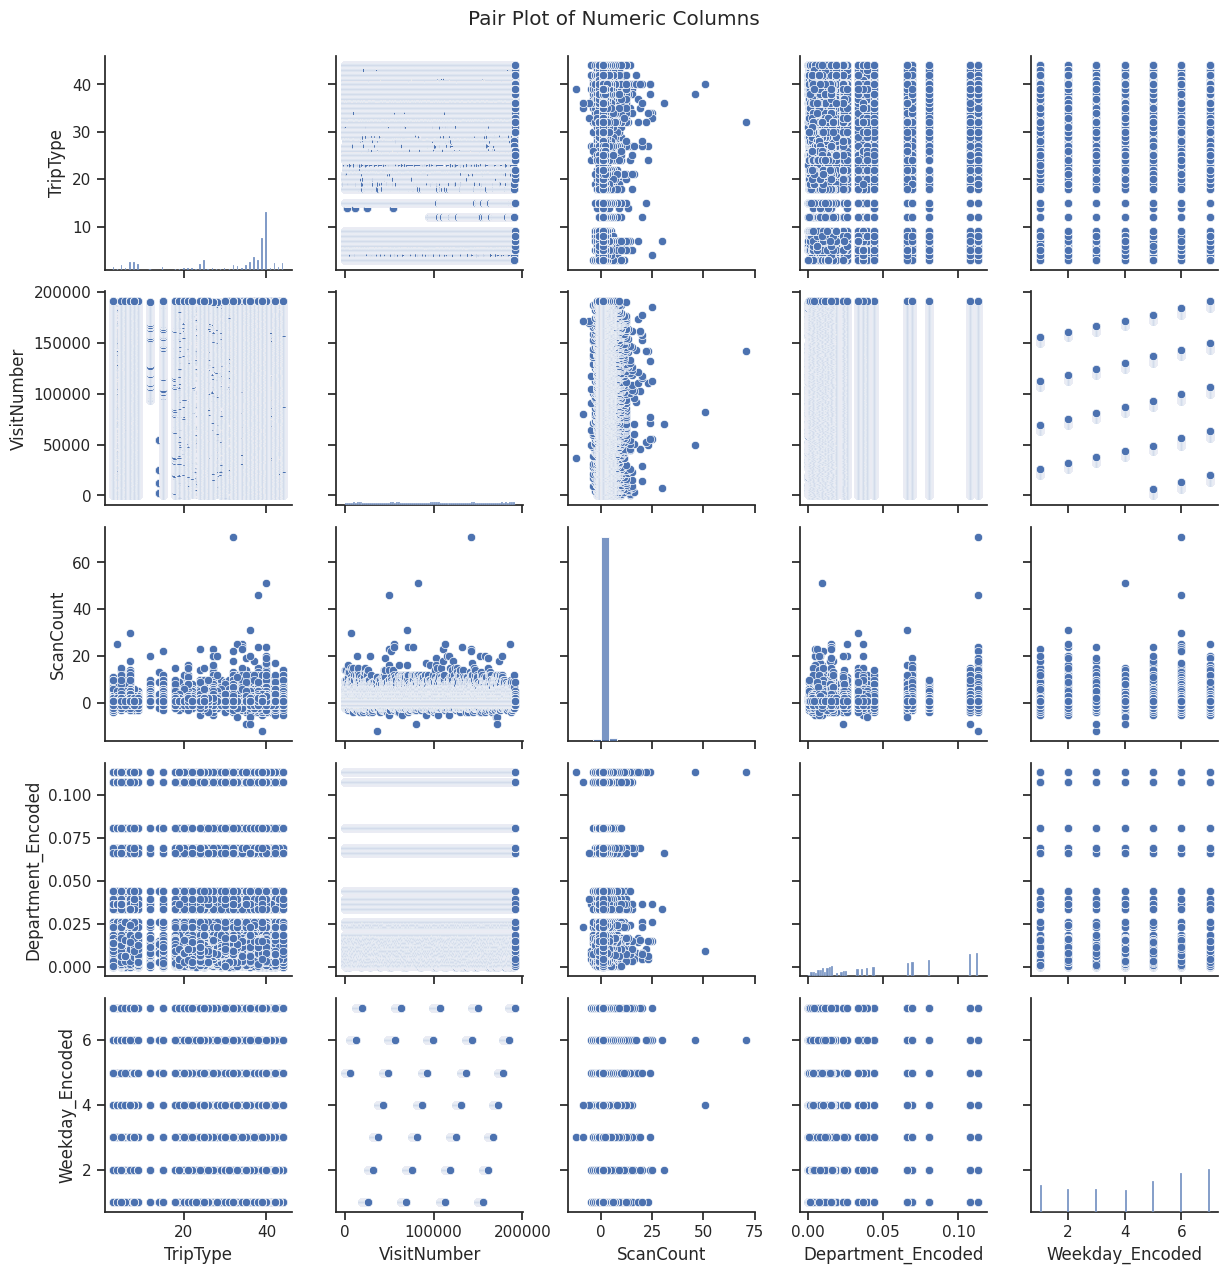

CPU times: user 43.6 s, sys: 1.05 s, total: 44.6 s
Wall time: 57.4 s


In [19]:
%%time
# List of numeric columns to include in the scatter plot grid
numeric_columns = ['TripType','VisitNumber', 'ScanCount','Department_Encoded', 'Weekday_Encoded']
# Pair plot
sns.set(style='ticks')
sns.pairplot(walmart_train[numeric_columns])
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)
plt.show()

In [20]:
print(walmart_train.head(10))

    TripType  VisitNumber Weekday           Upc  ScanCount  DepartmentDescription  FinelineNumber  Department_Encoded  Weekday_Encoded  TotalItems  ReturnItems  UniqueItems  DepartmentCount  \
1         30            7  Friday  6.053882e+10          1                  SHOES          8931.0            0.009235                5           2            2            2                2   
2         30            7  Friday  7.410811e+09          1          PERSONAL CARE          4504.0            0.066072                5           2            2            2                2   
3         26            8  Friday  2.238404e+09          2  PAINT AND ACCESSORIES          3565.0            0.002596                5          28           28           21                7   
4         26            8  Friday  2.006614e+09          2  PAINT AND ACCESSORIES          1017.0            0.002596                5          28           28           21                7   
5         26            8  Friday  

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Creating a Baseline Model using <font color = Red><i>Multinomial Logistic Regression**


---

<font size=3 align='left'>
A baseline model serves as a starting point or reference for any data analysis or modeling task, setting the minimum expectation for model performance.
The need for a baseline model arises to establish a performance benchmark, check data predictability, start analysis quickly, justify model complexity, and set realistic expectations for model performance.
Now, the question arises, what to use as our baseline model? Logistic regression is typically used for binary classification tasks where the target variable has two possible classes (e.g., 1/0, yes/no, true/false). However, logistic regression can be extended to handle multi-class classification problems, like in our project, where there are more than two classes.

The extension of logistic regression to handle multi-class classification is known as "Multinomial Logistic Regression" or "Softmax Regression." It is a variation of logistic regression that allows us to predict the probability of an instance belonging to each class.


<font size=3 align='left'>
We are using a multinomial/multiclass logistic regression (softmax regression) model to handle the multi-class classification task. The model calculates the probabilities of each trip type for a given set of features and then assigns the data point to the trip type with the highest probability.

In [21]:
# Defining input and output columns
input_cols = ['VisitNumber', 'Upc', 'ScanCount', 'FinelineNumber', 'Department_Encoded', 'Weekday_Encoded', 'TotalItems', 'ReturnItems', 'UniqueItems', 'DepartmentCount', 'DepartmentFrequency']
output_cols = ['TripType']

In [22]:
# Spliting the training dataset into features (X) and target variable (y)
x_train = walmart_train[input_cols]
y_train = walmart_train[output_cols]

# Train-validation split
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [45]:
%%time

# Training the baseline model (using multinomial logistic regression)
baseline_model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)
baseline_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = baseline_model.predict(x_val)


# Comparing the predicted values (y_val_pred) with the actual values (y_val)
# Here, we can use various evaluation metrics like accuracy, precision, recall, F1-score, etc.
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation df Accuracy: {accuracy*100:.2f}%")

Validation df Accuracy: 27.72%
CPU times: user 4min 44s, sys: 2min 33s, total: 7min 18s
Wall time: 6min 16s


In [46]:
# saving your validation dataframe locally for manual validation
validation_df = pd.DataFrame(x_val)
validation_df['TripType_predicted'] = y_val_pred
validation_df['TripType_actual'] = y_val
print("Predicted Dataframe:\n", validation_df.head(10))
# validation_df.to_csv("C:/algernon_ka_nook/jovian_project_3/temp_data/multi_class_logistic_out_validation.csv")

Predicted Dataframe:
         VisitNumber           Upc  ScanCount  FinelineNumber  Department_Encoded  Weekday_Encoded  TotalItems  ReturnItems  UniqueItems  DepartmentCount  DepartmentFrequency  TripType_predicted  \
96710         27853  7.314928e+09          1          6642.0            0.009174                2          19           19           17               10                    3                  40   
291993        87821  7.432310e+09          1          3682.0            0.113112                5          24           24           19               10                    2                  40   
80478         22951  2.200890e+10          1          6025.0            0.015117                1          37           37           33               15                    3                  40   
469388       140021  1.114110e+09          1          3308.0            0.113112                6          72           72           68               11                   15                 

In [47]:
# Making predictions on the test dataset
x_test = walmart_test[input_cols]

# Using trained model to make predictions on the test dataset
y_pred = baseline_model.predict(x_test)

predictions_df = pd.DataFrame(walmart_test)
predictions_df['TripType'] = y_pred
print("Predicted Dataframe:\n", predictions_df.head(10))
# predictions_df.to_csv("C:/algernon_ka_nook/jovian_project_3/temp_data/multi_class_logistic_out.csv")

Predicted Dataframe:
    VisitNumber Weekday           Upc  ScanCount DepartmentDescription  FinelineNumber  Department_Encoded  Weekday_Encoded  TotalItems  ReturnItems  UniqueItems  DepartmentCount  \
0            1  Friday  7.250339e+10          1                 SHOES          3002.0            0.009514                5           4            4            4                3   
1            1  Friday  1.707711e+09          1                 DAIRY          1526.0            0.068869                5           4            4            4                3   
2            1  Friday  8.947000e+10          1                 DAIRY          1431.0            0.068869                5           4            4            4                3   
3            1  Friday  8.849121e+10          1     GROCERY DRY GOODS          3555.0            0.112912                5           4            4            4                3   
4            2  Friday  2.840015e+09          1           DSD GROCERY    

<font size=3 align='left'>
Upon examination, it is evident that our baseline model, Logistic Regression, yielded a validation accuracy of 27%. This outcome signifies a relatively low predictive performance, indicating that the model is able to make accurate predictions for only about 27% of the target values. Let's see if we can improve this accuracy using other models.

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Training using <font color = Red><i>Decision Trees**


---

<font size=3 align='left'>
The decision tree algorithm starts by examining the features in the dataset and selecting the one that best splits the data into different classes (trip types). The "best split" is determined based on a criterion such as Gini impurity or entropy. The goal is to find the feature that provides the most information gain or reduces uncertainty about the target variable (trip types) the most.
Once the best feature is selected, the dataset is split into subsets based on the values of that feature. Each subset represents a branch in the decision tree.
The process is then recursively repeated on each subset (branch) until a stopping criterion is met. The stopping criterion could be reaching a certain maximum depth of the tree, having a minimum number of samples in each leaf node, or other conditions to prevent overfitting.

In [48]:
%%time
from sklearn.tree import DecisionTreeClassifier

# Train-validation split
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Training the model on the training data
decision_tree_model.fit(x_train_split, y_train_split)

# Making predictions on the training data
y_train_pred = decision_tree_model.predict(x_train_split)

# Making predictions on the validation data
y_val_pred = decision_tree_model.predict(x_val)

# Accuracy of the model on the validation data
accuracy_train = accuracy_score(y_train_split, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)

# Calculate precision, recall, and F1-Score
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print(f"Decision Tree Model Accuracy in Training df: {accuracy_train*100:.2f}%")
print(f"Decision Tree Model Accuracy in Validation df: {accuracy_val*100:.7f}%")
print(f"Decision Tree Model Precision in Validation df: {precision_val:.7f}")
print(f"Decision Tree Model Recall in Validation df: {recall_val:.7f}")
print(f"Decision Tree Model F1-Score in Validation df: {f1_val:.7f}")

Decision Tree Model Accuracy in Training df: 100.00%
Decision Tree Model Accuracy in Validation df: 73.4234306%
Decision Tree Model Precision in Validation df: 0.7345939
Decision Tree Model Recall in Validation df: 0.7342343
Decision Tree Model F1-Score in Validation df: 0.7343762
CPU times: user 8.63 s, sys: 167 ms, total: 8.8 s
Wall time: 8.95 s


<font size=3 align='left'>
An accuracy of 100.00% on the training data means that the model has perfectly learned the training data, including both the patterns and the noise in the data. This is a strong indication of overfitting. The model has essentially memorized the training data, which is why it performs so well on it.

Decision Tree model gives an accuracy of 73.42% on validation dataset which is more than what we observed in our dumb baseline model and is significantly lower than the training accuracy. This indicates that although the model is generalizing comparatively well to new, unseen data (validation data), we can still improve the validation accuracy by hyperparameter tuning using GridSearchCV.

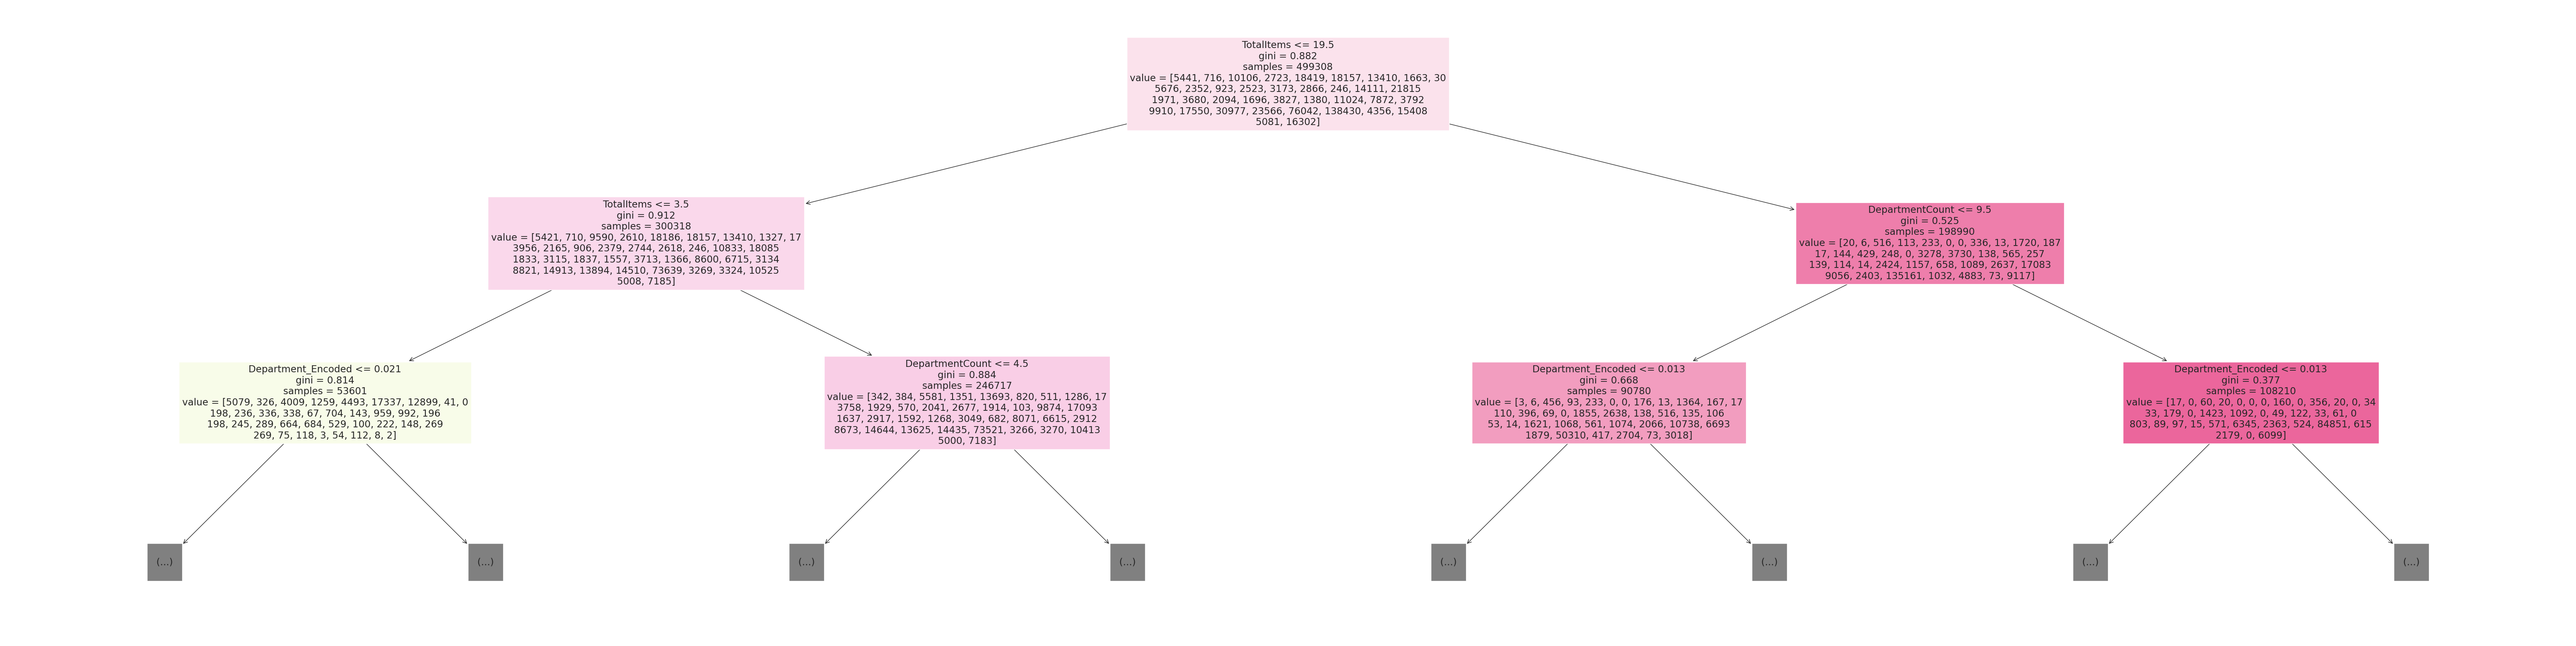

In [49]:
# Visualising Decision Trees
from sklearn.tree import plot_tree, export_text

# Convert the feature names to a list
feature_names_list = list(x_train_split.columns)

plt.figure(figsize=(80,20))
plot_tree(decision_tree_model, feature_names=feature_names_list, max_depth=2, filled=True);

                feature  importance
6            TotalItems    0.214148
0           VisitNumber    0.206150
4    Department_Encoded    0.129643
8           UniqueItems    0.078004
3        FinelineNumber    0.074213
1                   Upc    0.071072
5       Weekday_Encoded    0.062028
9       DepartmentCount    0.061503
10  DepartmentFrequency    0.049570
7           ReturnItems    0.047310


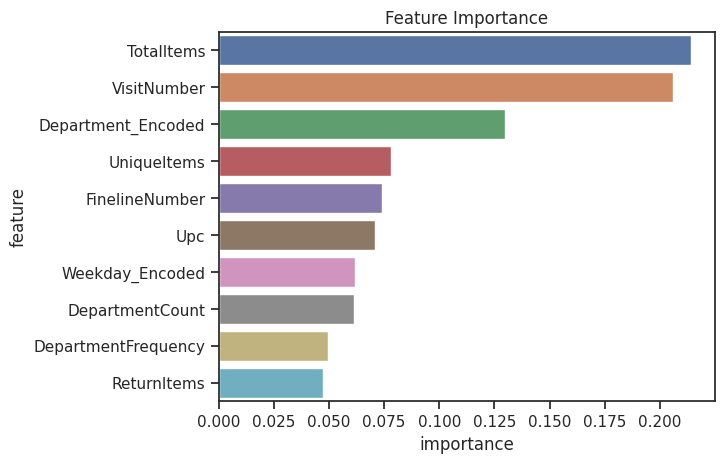

In [50]:
# Feature Importance

importance_df = pd.DataFrame({
    'feature': x_train_split.columns,
    'importance': decision_tree_model.feature_importances_
}).sort_values('importance', ascending=False)
print(importance_df.head(10))

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## **<font color = Grey>Optimizing Decision Trees through Hyperparameter Refinement**

<font size=3 align='left'>
Hyperparameters are parameters of a machine learning model that are learned during training and are predefined by the user or data scientist and affect the behavior of the learning algorithm.
In the decision tree model above, the hyperparameters to be tuned are: <b><i>max_depths, min_samples_leaf, max_features, min_samples_split, criterion.</i></b> Let us manually check the effect of these hyperparameters on validation accuracy.

In [51]:
%%time
def test_params_dt(**params):
    # Train-validation split
    x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    decision_tree_model = DecisionTreeClassifier(random_state=42, **params).fit(x_train_split, y_train_split)
    y_train_pred = decision_tree_model.predict(x_train_split)
    y_val_pred = decision_tree_model.predict(x_val)
    return accuracy_score(y_train_split, y_train_pred), accuracy_score(y_val, y_val_pred)

print("Parameter max_depth = 100 gives accuracy:", test_params_dt(max_depth=100)) # correct, 0.7342343064056142
print("Parameter criterion = 'entropy' gives accuracy:", test_params_dt(criterion='entropy')) # correct, 0.773768705739097
print("Parameter min_samples_split = 2 gives accuracy:", test_params_dt(min_samples_split=2)) # correct, 0.7342343064056142
print("Parameter min_samples_leaf = 2 gives accuracy:", test_params_dt(min_samples_leaf=2)) # correct, 0.7082305252026789
print("Parameter max_features = None gives accuracy:", test_params_dt(max_features=None)) # correct, 0.7342343064056142
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Final Tuned accuracy for decision tree:", test_params_dt(max_depth=100, criterion='entropy', min_samples_split=2, min_samples_leaf=2, max_features=None)) #


Parameter max_depth = 100 gives accuracy: (1.0, 0.7342343064056142)
Parameter criterion = 'entropy' gives accuracy: (1.0, 0.773768705739097)
Parameter min_samples_split = 2 gives accuracy: (1.0, 0.7342343064056142)
Parameter min_samples_leaf = 2 gives accuracy: (0.9124508319514207, 0.7082305252026789)
Parameter max_features = None gives accuracy: (1.0, 0.7342343064056142)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Final Tuned accuracy for decision tree: (0.9257211981382233, 0.7487823244784824)
CPU times: user 54.3 s, sys: 951 ms, total: 55.2 s
Wall time: 55.4 s


<font size=3 align='left'>
Through trial and error we have observed that the accuracy increases by changing the criterian to 'entropy'. For the other parameters, the validation accuracy remains same. The overall tuned accuracy comes out to be 74.87% which is more than the pre tuned accuracy (73.42%).

GridSearchCV and RandomizedSearchCV are powerful techniques for hyperparameter tuning in machine learning models. They help us systematically search through different combinations of hyperparameters to find the best set that optimizes the model's performance. Let's see if we can improve the validation accuracy furthermore using these techniques.

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>GridSearchCV and RandomizedSearchCV**


---

<font size=3 align='left'>
The function below takes a model and a parameter grid as input, and then performs hyperparameter tuning using GridSearchCV and RandomizedSearchCV based on the provided parameter grid values and the training data. This helps in finding the best hyperparameters for the given model, potentially improving its performance. It's a systematic way of searching through different hyperparameters to optimize the model's performance without relying solely on manual trial and error.

In [28]:
# Function to tune hyperparameters using GridSearchCV and RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def tune_hyperparameters(model, param_grid_gs, param_grid_rs, x_train, y_train, cv_gs, cv_rs, n_iter):
    # Train-validation split
    x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # GridSearchCV
    grid_search = GridSearchCV(model, param_grid_gs, cv=cv_gs, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_split, y_train_split)

    # Best hyperparameters
    best_params_grid = grid_search.best_params_
    best_model_grid = grid_search.best_estimator_
    val_accuracy_grid = best_model_grid.score(x_val, y_val)

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_grid_rs, n_iter=n_iter, cv=cv_rs, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(x_train_split, y_train_split)

    # Best hyperparameters
    best_params_random = random_search.best_params_
    best_model_random = random_search.best_estimator_
    val_accuracy_random = best_model_random.score(x_val, y_val)

    # Making predictions on the validation data using the best grid search model
    y_val_pred_grid = best_model_grid.predict(x_val)

    # Making predictions on the validation data using the best randomized search model
    y_val_pred_random = best_model_random.predict(x_val)

    # Calculate precision, recall, and F1-Score for the grid search model
    precision_val_grid = precision_score(y_val, y_val_pred_grid, average='weighted')
    recall_val_grid = recall_score(y_val, y_val_pred_grid, average='weighted')
    f1_val_grid = f1_score(y_val, y_val_pred_grid, average='weighted')

    # Calculate precision, recall, and F1-Score for the randomized search model
    precision_val_random = precision_score(y_val, y_val_pred_random, average='weighted')
    recall_val_random = recall_score(y_val, y_val_pred_random, average='weighted')
    f1_val_random = f1_score(y_val, y_val_pred_random, average='weighted')

    return (
        best_params_grid, val_accuracy_grid,
        best_params_random, val_accuracy_random,
        precision_val_grid, recall_val_grid, f1_val_grid,
        precision_val_random, recall_val_random, f1_val_random
    )

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Using GridSearchCV and RandomizedSearchCV for Decision Trees**


---

In [53]:
%%time
# Define the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV Parameters
param_grid_gs = {
    'max_depth': [100, 500],
    'min_samples_leaf': [2, 3, 4],
    'max_features': [None],
    'min_samples_split': [2, 3, 4],
    'criterion': ['entropy']
}

# RandomizedSearchCV Parameters
param_grid_rs = {
  "criterion": ['entropy'],
  "max_depth": [100, 200, 500],
  'min_samples_leaf': [2, 3, 4],
  'max_features': [None],
  'min_samples_split': [2, 3, 4],
  "splitter": ["best", "random"]
  }

# Call the function with the defined model and hyperparameter grid
best_params_grid, val_accuracy_grid, best_params_random, val_accuracy_random, precision_val_grid, recall_val_grid, f1_val_grid, precision_val_random, recall_val_random, f1_val_random = tune_hyperparameters(decision_tree_model, param_grid_gs, param_grid_rs, x_train, y_train, cv_gs = 5, cv_rs = 2, n_iter = 2)

# Print the results
print("GridSearchCV - Best hyperparameters:", best_params_grid)
print("GridSearchCV - Validation accuracy:", val_accuracy_grid)
print("RandomizedSearchCV - Best hyperparameters:", best_params_random)
print("RandomizedSearchCV - Validation accuracy:", val_accuracy_random)
print(f"Decision Tree Model Precision in Validation df (Grid Search): {precision_val_grid:.7f}")
print(f"Decision Tree Model Recall in Validation df (Grid Search): {recall_val_grid:.7f}")
print(f"Decision Tree Model F1-Score in Validation df (Grid Search): {f1_val_grid:.7f}")
print(f"Decision Tree Model Precision in Validation df (Random Search): {precision_val_random:.7f}")
print(f"Decision Tree Model Recall in Validation df (Random Search): {recall_val_random:.7f}")
print(f"Decision Tree Model F1-Score in Validation df (Random Search): {f1_val_random:.7f}")

GridSearchCV - Best hyperparameters: {'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
GridSearchCV - Validation accuracy: 0.7487823244784824
RandomizedSearchCV - Best hyperparameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 200, 'criterion': 'entropy'}
RandomizedSearchCV - Validation accuracy: 0.7563687634184638
Decision Tree Model Precision in Validation df (Grid Search): 0.7537511
Decision Tree Model Recall in Validation df (Grid Search): 0.7487823
Decision Tree Model F1-Score in Validation df (Grid Search): 0.7501211
Decision Tree Model Precision in Validation df (Random Search): 0.7634427
Decision Tree Model Recall in Validation df (Random Search): 0.7563688
Decision Tree Model F1-Score in Validation df (Random Search): 0.7583637
CPU times: user 23.2 s, sys: 2.36 s, total: 25.6 s
Wall time: 11min 57s


<font size=4 align='left' color ="Green"><b><i>Observation</b></i>:</font><br>
<font size=3 align='left'><b>
<li>Original Validation accuracy: 73.42%
<li>GridSearchCV - Validation accuracy: 74.87%
<li>RandomizedSearchCV - Validation accuracy: 75.63%
</b>

Both GridSearchCV and RandomizedSearchCV have led to an improvement in the model's accuracy compared to the original accuracy. This indicates that tuning the hyperparameters has enhanced the decision tree model's ability to capture patterns and make better predictions on the validation set.
RandomizedSearchCV has resulted in a slightly higher validation accuracy compared to GridSearchCV. This suggests that RandomizedSearchCV's random sampling of hyperparameters has been effective in finding a combination that performs well on your specific dataset.

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Training using <font color = Red><i>Random Forests**


---

<font size=3 align='left'>
A random forest is a machine learning model that makes decisions by combining the opinions of multiple decision trees. It creates a group of decision trees, each trained on a different subset of the data. By combining the predictions of multiple trees, a random forest can make more accurate and reliable decisions compared to a single decision tree.

In [54]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Train-validation split
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# # Reshaping the target variables to 1-dimensional arrays
# y_train_split = y_train_split.ravel()
# y_val = y_val.ravel()

# Training the model on the training data
random_forest_model.fit(x_train_split, y_train_split)

# Making predictions on the training data
y_train_pred = random_forest_model.predict(x_train_split)

# Making predictions on the validation data
y_val_pred = random_forest_model.predict(x_val)

# Accuracy of the model on the validation data
accuracy_train = accuracy_score(y_train_split, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)

# Calculate precision, recall, and F1-Score
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print(f"Random forest Model Accuracy in Training df: {accuracy_train*100:.2f}%")
print(f"Random forest Model Accuracy in Validation df: {accuracy_val*100:.7f}%")
print(f"Random forest Model Precision in Validation df: {precision_val:.7f}")
print(f"Random forest Model Recall in Validation df: {recall_val:.7f}")
print(f"Random forest Model F1-Score in Validation df: {f1_val:.7f}")

Random forest Model Accuracy in Training df: 100.00%
Random forest Model Accuracy in Validation df: 77.5667318%
Random forest Model Precision in Validation df: 0.7885181
Random forest Model Recall in Validation df: 0.7756673
Random forest Model F1-Score in Validation df: 0.7712220
CPU times: user 4min 10s, sys: 22 s, total: 4min 32s
Wall time: 4min 35s


<font size=3 align='left'>
Random Forests gives the validation accuracy 77.5667318% which is more than what Decision Trees gave.
The higher validation accuracy achieved by Random Forests suggests that the ensemble nature of Random Forests reduces overfitting, captures diverse patterns in the data, and enhances generalization. The aggregated predictions of multiple trees mitigate the impact of noise and outliers, resulting in improved robustness and better predictive performance. The complexity of the ensemble model might compromise interpretability, but the trade-off between interpretability and accuracy favors Random Forests as a more effective choice for your specific problem. Let's try to improve the validation accuracy from random forests furthermore using hyperparameter tuning.

## **<font color = Grey>Optimizing Random Forests through Hyperparameter Refinement**

<font size=3 align='left'>
Let's search through different hyperparameters to optimize the Random Forest model performance using manual trial and error and then tune using GridSearchCV and RandomizedSearchCV.

In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier

def test_params_dt(**params):
    # Train-validation split
    x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    random_forest_model = RandomForestClassifier(random_state=42, **params).fit(x_train_split, y_train_split)
    y_train_pred = random_forest_model.predict(x_train_split)
    y_val_pred = random_forest_model.predict(x_val)
    return accuracy_score(y_train_split, y_train_pred), accuracy_score(y_val, y_val_pred)

print("Parameter max_depth = 100 gives accuracy:", test_params_dt(max_depth=100)) # 0.7756673182298843
print("Parameter criterion = 'entropy' gives accuracy:", test_params_dt(criterion='entropy')) # 0.8039302079661614
print("Parameter min_samples_split = 2 gives accuracy:", test_params_dt(min_samples_split=2)) # 0.7756673182298843
print("Parameter min_samples_leaf = 2 gives accuracy:", test_params_dt(min_samples_leaf=2)) # 0.7525234722978819
print("Parameter max_features = None gives accuracy:", test_params_dt(max_features=None)) # 0.7898067741211907
print("Parameter n_estimators = 50 gives accuracy:", test_params_dt(n_estimators=100)) # 0.7756673182298843
print("Parameter bootstrap = True gives accuracy:", test_params_dt(bootstrap = True)) # 0.7756673182298843
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Final Tuned accuracy for random forest tree:", test_params_dt(max_depth=100, criterion='entropy', min_samples_split=2, min_samples_leaf=2, max_features=None, bootstrap = True, n_estimators = 50, n_jobs=-1)) # 0.8056605889704233


Parameter max_depth = 100 gives accuracy: (0.9999959944563276, 0.7756673182298843)
Parameter criterion = 'entropy' gives accuracy: (0.9999959944563276, 0.8039302079661614)
Parameter min_samples_split = 2 gives accuracy: (0.9999959944563276, 0.7756673182298843)
Parameter min_samples_leaf = 2 gives accuracy: (0.9693816241678483, 0.7525234722978819)
Parameter max_features = None gives accuracy: (0.9999919889126551, 0.7898067741211907)
Parameter n_estimators = 50 gives accuracy: (0.9999959944563276, 0.7756673182298843)
Parameter bootstrap = True gives accuracy: (0.9999959944563276, 0.7756673182298843)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Final Tuned accuracy for random forest tree: (0.9828001954705312, 0.8046672220976063)
CPU times: user 46min 6s, sys: 1min 34s, total: 47min 40s
Wall time: 43min 11s


<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Using GridSearchCV and RandomizedSearchCV for Random Forests**


---

In [29]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Define the model
random_forest_model = RandomForestClassifier(random_state=42)

# GridSearchCV Parameters
param_grid_gs = {
    'max_depth': [100],
    'min_samples_leaf': [2],
    'max_features': [None],
    'min_samples_split': [2],
    'criterion': ['entropy']
}

# RandomizedSearchCV Parameters
param_grid_rs = {
    "criterion": ['entropy'],
    "max_depth": [100],
    'min_samples_leaf': [2],
    'max_features': [None],
    'min_samples_split': [2],
    "n_estimators": [50],
    "bootstrap": [True]
}

# Call the function with the defined model and hyperparameter grid
best_params_grid, val_accuracy_grid, best_params_random, val_accuracy_random, precision_val_grid, recall_val_grid, f1_val_grid, precision_val_random, recall_val_random, f1_val_random = tune_hyperparameters(random_forest_model, param_grid_gs, param_grid_rs, x_train, y_train, cv_gs = 2, cv_rs = 2, n_iter = 2)

# Print the results
print("GridSearchCV - Best hyperparameters:", best_params_grid)
print("GridSearchCV - Validation accuracy:", val_accuracy_grid)
print("RandomizedSearchCV - Best hyperparameters:", best_params_random)
print("RandomizedSearchCV - Validation accuracy:", val_accuracy_random)
print(f"Random Forest Tree Model Precision in Validation df (Grid Search): {precision_val_grid:.7f}")
print(f"Random Forest Model Recall in Validation df (Grid Search): {recall_val_grid:.7f}")
print(f"Random Forest Model F1-Score in Validation df (Grid Search): {f1_val_grid:.7f}")
print(f"Random Forest Model Precision in Validation df (Random Search): {precision_val_random:.7f}")
print(f"Random Forest Model Recall in Validation df (Random Search): {recall_val_random:.7f}")
print(f"Random Forest Model F1-Score in Validation df (Random Search): {f1_val_random:.7f}")

GridSearchCV - Best hyperparameters: {'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
GridSearchCV - Validation accuracy: 0.8056605889704233
RandomizedSearchCV - Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': True}
RandomizedSearchCV - Validation accuracy: 0.8046672220976063
Random Forest Tree Model Precision in Validation df (Grid Search): 0.8133901
Random Forest Model Recall in Validation df (Grid Search): 0.8056606
Random Forest Model F1-Score in Validation df (Grid Search): 0.8032227
Random Forest Model Precision in Validation df (Random Search): 0.8118121
Random Forest Model Recall in Validation df (Random Search): 0.8046672
Random Forest Model F1-Score in Validation df (Random Search): 0.8023003
CPU times: user 19min 35s, sys: 13.1 s, total: 19min 48s
Wall time: 37min 55s


<font size=4 align='left' color ="Green"><b><i>Observation</b></i>:</font><br>
<font size=3 align='left'><b>
<li>Original Validation accuracy: 77.56%
<li>GridSearchCV - Validation accuracy: 80.56%
<li>RandomizedSearchCV - Validation accuracy: 80.46%
</b>

As observed above, GridSearchCV and RandomizedSearchCV have performed significantly better than what we had observed before tuning.


<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Final Findings**


---

In [25]:
# Table for the Final Findings
models = ['Decision Trees', 'Random Forests']
accuracy_before_tuning = [73.42, 77.56]
accuracy_manual_tuning = [74.87, 80.56]
accuracy_GridSearchCV_tuning = [74.87, 80.56]
accuracy_RandomizedSearchCV_tuning = [75.63, 80.46]

data = {'Model': models, 'Before Tuning': accuracy_before_tuning,'Post Manual Tuning': accuracy_manual_tuning,
        'GridSearchCV Tuning': accuracy_GridSearchCV_tuning,'RandomizedSearchCV Tuning': accuracy_RandomizedSearchCV_tuning}
final_finding_table = pd.DataFrame(data)

print(final_finding_table)

            Model  Before Tuning  Post Manual Tuning  GridSearchCV Tuning  RandomizedSearchCV Tuning
0  Decision Trees          73.42               74.87                74.87                      75.63
1  Random Forests          77.56               80.56                80.56                      80.46


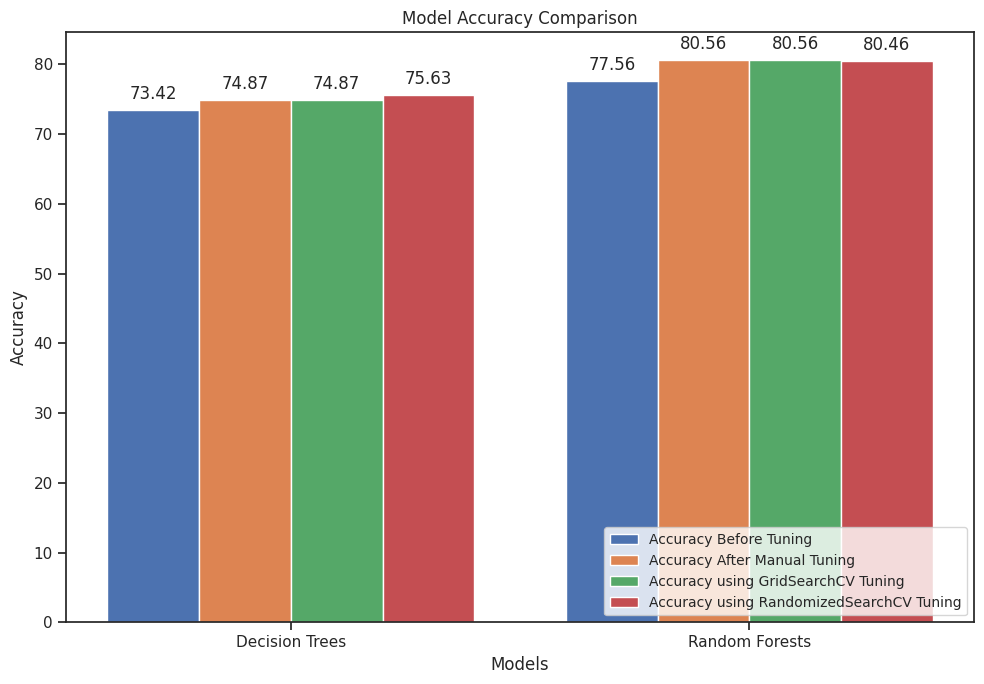

In [26]:
# Graph for findings

models = ['Decision Trees', 'Random Forests']
accuracy_before_tuning = [73.42, 77.56]
accuracy_manual_tuning = [74.87, 80.56]
accuracy_GridSearchCV_tuning = [74.87, 80.56]
accuracy_RandomizedSearchCV_tuning = [75.63, 80.46]

bar_width = 0.2  # Width of each bar
index = range(len(models))  # Index for x-axis positions

plt.figure(figsize=(10, 7))
plt.bar(index, accuracy_before_tuning, width=bar_width, label='Accuracy Before Tuning')
plt.bar([i + bar_width for i in index], accuracy_manual_tuning, width=bar_width, label='Accuracy After Manual Tuning')
plt.bar([i + 2 * bar_width for i in index], accuracy_GridSearchCV_tuning, width=bar_width, label='Accuracy using GridSearchCV Tuning')
plt.bar([i + 3 * bar_width for i in index], accuracy_RandomizedSearchCV_tuning, width=bar_width, label='Accuracy using RandomizedSearchCV Tuning')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([i + 1.5 * bar_width for i in index], models)  # Adjust x-axis labels
plt.legend(loc='lower right', fontsize='small'
)

# Add values on top of the bars
for i in index:
    plt.text(i, accuracy_before_tuning[i] + 1, str(accuracy_before_tuning[i]), ha='center', va='bottom')
    plt.text(i + bar_width, accuracy_manual_tuning[i] + 1, str(accuracy_manual_tuning[i]), ha='center', va='bottom')
    plt.text(i + 2 * bar_width, accuracy_GridSearchCV_tuning[i] + 1, str(accuracy_GridSearchCV_tuning[i]), ha='center', va='bottom')
    plt.text(i + 3 * bar_width, accuracy_RandomizedSearchCV_tuning[i] + 1, str(accuracy_RandomizedSearchCV_tuning[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<font size=3 align='left'>
<li>Manual tuning led to a noticeable improvement in accuracy for both models, suggesting that hand-picking specific hyperparameters based on domain knowledge or experimentation can have a positive impact.</li>
<li>GridSearchCV tuning did not result in a significant accuracy improvement over manual tuning, possibly indicating that the initial manual tuning was effective.</li>
<li>RandomizedSearchCV tuning showed some incremental improvement over manual tuning, demonstrating the potential of exploring a broader hyperparameter space.</li>
<b><li>Random Forests consistently outperformed Decision Trees across all tuning approaches, reinforcing the notion that ensemble methods often lead to better predictive performance.</li></b>
<li>Achieving an accuracy of over 80% using the Random Forest model is promising, but further exploration of feature engineering, data preprocessing, and potentially more advanced models could lead to even higher performance.</li>


<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Saving the Selected Model and Predicting Test Data**


---

In [2]:
# import joblib

# encoded_cols = ['Department_Encoded', 'Weekday_Encoded']
# categorical_cols = ['Weekday','DepartmentDescription']
# numeric_cols = ['TripType', 'VisitNumber', 'Upc', 'ScanCount', 'FinelineNumber', 'Department_Encoded', 'Weekday_Encoded', 'TotalItems', 'ReturnItems', 'UniqueItems', 'DepartmentCount', 'DepartmentFrequency']

# walmart_tripp_type_classification_model = {
#     'model': random_forest_model,
#     'deduplicate': drop_duplicates,
#     'remove_999_triptype': remove_999_triptype,
#     'impute_missing_values': impute_missing_values,
#     'encode_features': encode_features,
#     'encode_additional_features': encode_additional_features,
#     'numeric_cols': numeric_cols,
#     'categorical_cols': categorical_cols,
#     'encoded_cols': encoded_cols,
#     'input_cols': input_cols,
#     'output_cols': output_cols
# }

# joblib.dump(walmart_tripp_type_classification_model, 'walmart_tripp_type_classification_model.joblib')
# loaded_model = joblib.load('walmart_trip_type_classification_model.joblib')

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Summary & Insights**


---

<font size=3 align='left'>
In the Walmart Trip Type Classification project, we aimed to predict trip types based on transactional data. The dataset contained various features such as trip-related information, product descriptions, and purchase details. We followed the standard steps in solving a machine learning problem to develop our models.
<br>

<li>Data Understanding: We explored the dataset to understand the available features, their types, and distributions. We also examined the target variable, trip types, to ensure it was suitable for a classification problem.</li>

<li>Data Preparation: We cleaned the data by handling missing values, encoding categorical variables, and creating new features if necessary. We split the data into training and validation sets for model evaluation.</li>

<li>Baseline Model: We created a quick and easy baseline model, such as Logistic Regression, to establish a benchmark for our future models' performance.</li>

<li>Model Selection and Tuning: We experimented with various models like Random Forest and Decision Trees. We used techniques like GridSearchCV and RandomizedSearchCV to tune hyperparameters and find the best configurations for each model.</li>

<li>Model Evaluation: We evaluated our models using accuracy and other relevant metrics on the validation set to measure their performance.</li>

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>Future Works**


---

<li>Using Gradient Boosting models like XGBoost or LightGBM and SVM. These models are known for their powerful performance and often outperform traditional algorithms.
<li>Explore the use of deep learning techniques, such as Neural Networks.
<li>Continue experimenting with feature engineering by creating more meaningful features from the existing ones.
<li>Conduct error analysis to understand misclassifications and identify patterns in the predictions. This analysis can guide further improvements in the models.
<li>Improve Hyperparameter tuning.
<br>

In conclusion, the Walmart Trip Type Classification project presents several opportunities for further enhancement. By exploring new models, improving feature engineering, we can achieve even better results and gain deeper insights into customer trip types and preferences. Continuously iterating and experimenting with different approaches will find the most effective solutions for this classification problem.

<img src="https://i.ibb.co/2SrH2kn/logo-white-removebg-preview.png" alt="Image" width="35" height="35">

# **<font color = Grey>References**


---

<li>Dataset Link: https://www.kaggle.com/competitions/walmart-recruiting-trip-type-classification
<li>Documentation: https://scikit-learn.org/